# Customer Churn: Insights and Solutions

This notebook contains key questions derived from the EDA of the Telco Customer Churn dataset, along with their analysis using pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

df = pd.read_csv('cleaned_telco_churn.csv')

## Q1: Which contract type has the highest churn rate?

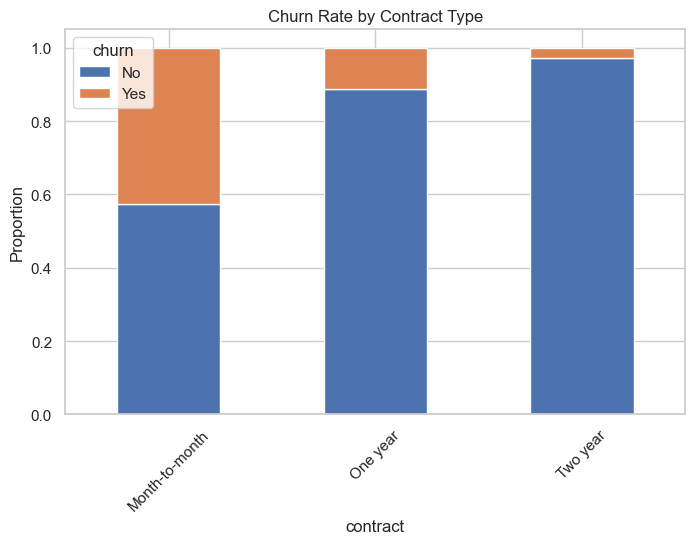

In [2]:
contract_churn = df.groupby('contract')['churn'].value_counts(normalize=True).unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

🔍 **Insight:** *Customers on Month-to-month contracts have the highest churn rate by a wide margin. This suggests that the flexibility of monthly plans may come with less customer commitment. Lock-in contracts like One year and Two year significantly reduce churn.*

## Q2: Are senior citizens more likely to churn than younger customers?

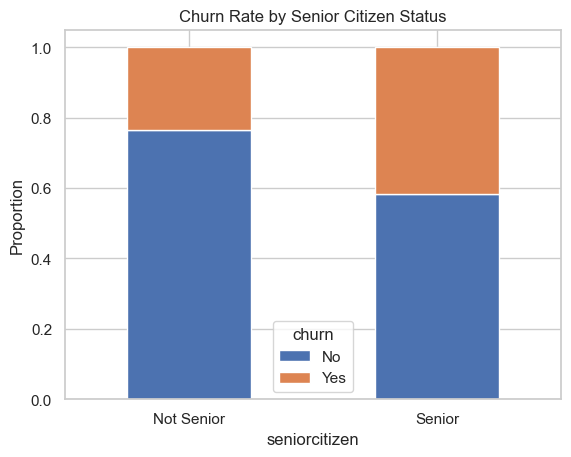

In [3]:
senior_churn = df.groupby('seniorcitizen')['churn'].value_counts(normalize=True).unstack()
senior_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Senior', 'Senior'], rotation=0)
plt.show()

🔍 **Insight:** *Yes. Senior citizens show a higher churn rate compared to non-seniors. This could be due to different service expectations, tech savviness, or pricing sensitivity in this demographic.*

## Q3: Does having tech support lower the chance of churn?

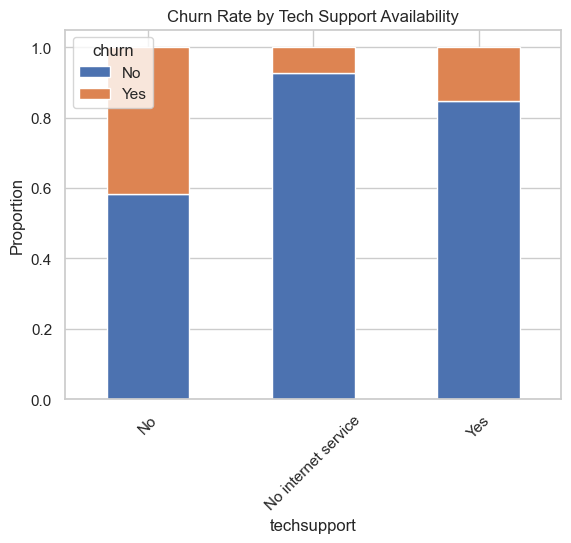

In [4]:
techsupport_churn = df.groupby('techsupport')['churn'].value_counts(normalize=True).unstack()
techsupport_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Tech Support Availability')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

🔍 **Insight:** *Customers who have Tech Support = Yes are much less likely to churn. Lack of technical support appears to contribute significantly to frustration and eventual cancellation.*

## Q4: What is the relationship between monthly charges and churn?

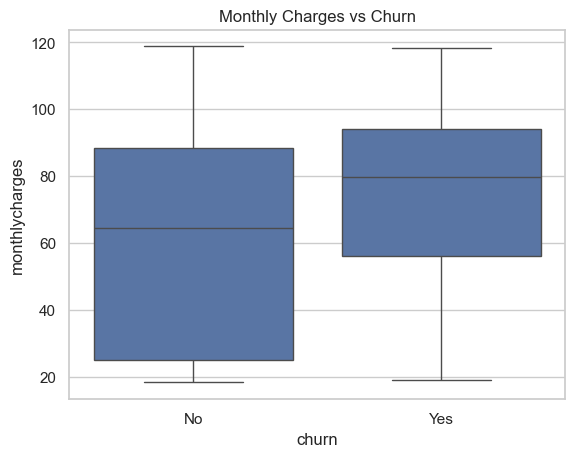

In [5]:
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

🔍 **Insight:** *Customers who churn tend to have higher monthly charges on average. While not the only factor, expensive plans may discourage long-term retention, especially without bundled services or promotions.*

## Q5: Does the type of internet service impact churn behavior?

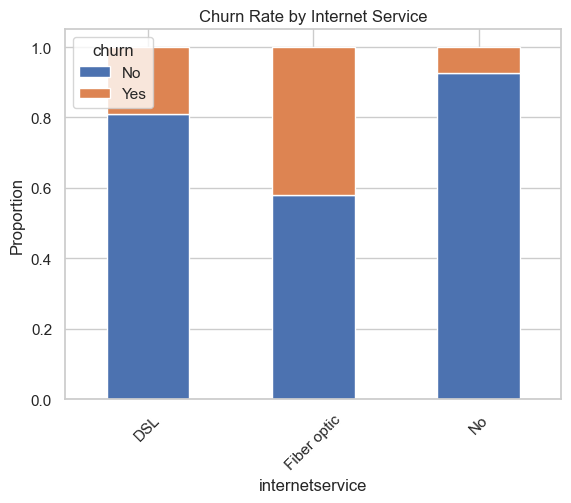

In [6]:
internet_churn = df.groupby('internetservice')['churn'].value_counts(normalize=True).unstack()
internet_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate by Internet Service')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

🔍 **Insight:** *Customers with Fiber optic internet churn more frequently than those with DSL or no internet. This could be due to cost, service reliability, or higher expectations from fiber users.*

## Q6: Which payment methods are riskier in terms of customer churn?

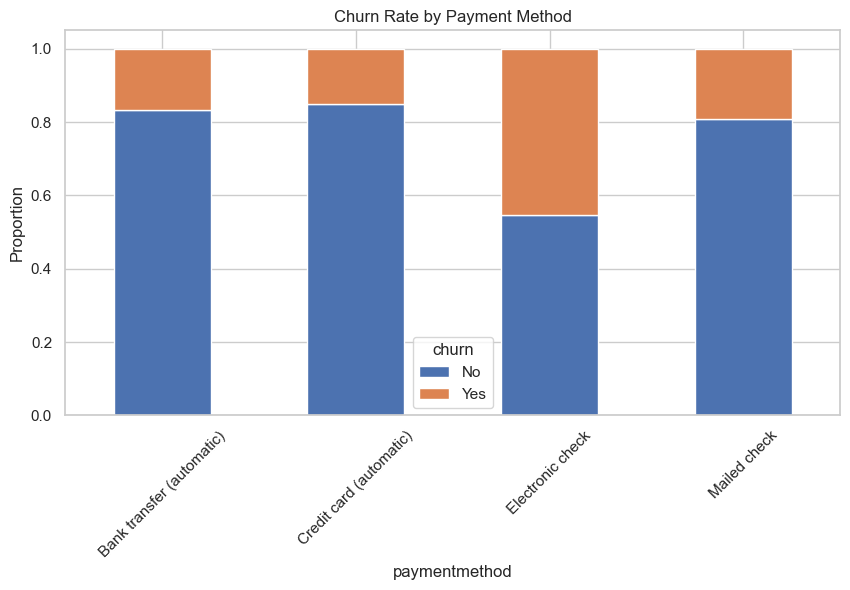

In [7]:
payment_churn = df.groupby('paymentmethod')['churn'].value_counts(normalize=True).unstack()
payment_churn.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Churn Rate by Payment Method')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

🔍 **Insight:** *The Electronic check payment method is associated with a significantly higher churn rate. In contrast, customers using automatic payments (bank transfer or credit card) tend to be more stable.*

## Q7: How does customer tenure relate to their churn probability?

In [8]:
df.groupby('churn')['tenure'].describe()[['mean', '50%', 'min', 'max']]

,mean,50%,min,max
churn,,,,
No,37.569965,38.0,0.0,72.0
Yes,17.979133,10.0,1.0,72.0


🔍 **Insight:** *Customers who stay longer (higher tenure) are far less likely to churn. This suggests early engagement and retention strategies are key — if a customer makes it past the early stages, they're likely to stay.*

HERE YES MEANS CUSTOMER HAS LEFT THE SERVICE, NO MEANS CUSTOMER IS STILL ACTIVE